In [99]:
import os 
os.getcwd()
import numpy as np
import sklearn.preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Clean data
import re

In [100]:
! ls /Users/amalseby/Desktop/IN

Linh_project.ipynb    icd9toicd10cmgem.csv  primary(1).ipynb
Untitled.ipynb        icd_code_new.csv      pyxis.csv
Untitled1.ipynb       intial_analysis.ipynb revised(1).ipynb
diagnosis.csv         medrecon.csv          triage.csv
edstays.csv           notes.docx            vitalsign.csv


In [101]:
medrecon = look_n_load('/Users/amalseby/Desktop/IN/medrecon.csv')
medrecon.head()


Shape: (3143791, 9)

Columns: ['subject_id', 'stay_id', 'charttime', 'name', 'gsn', 'ndc', 'etc_rn', 'etccode', 'etcdescription']

Missing proportions:
 subject_id        0.000000
stay_id           0.000000
charttime         0.000000
name              0.000000
gsn               0.000000
ndc               0.000000
etc_rn            0.000000
etccode           0.003938
etcdescription    0.003938
dtype: float64


,subject_id,stay_id,charttime,name,gsn,ndc,etc_rn,etccode,etcdescription
0,10000032,32952584,2180-07-22 17:26:00,albuterol sulfate,28090,21695042308,1,5970.0,Asthma/COPD Therapy - Beta 2-Adrenergic Agents...
1,10000032,32952584,2180-07-22 17:26:00,calcium carbonate,1340,10135021101,1,733.0,Minerals and Electrolytes - Calcium Replacement
2,10000032,32952584,2180-07-22 17:26:00,cholecalciferol (vitamin D3),65241,37205024678,1,670.0,Vitamins - D Derivatives
3,10000032,32952584,2180-07-22 17:26:00,emtricitabine-tenofovir [Truvada],57883,35356007003,1,5849.0,Antiretroviral - Nucleoside and Nucleotide Ana...
4,10000032,32952584,2180-07-22 17:26:00,fluticasone [Flovent HFA],21251,49999061401,1,371.0,Asthma Therapy - Inhaled Corticosteroids (Gluc...


In [102]:
pyxis = look_n_load('/Users/amalseby/Desktop/IN/pyxis.csv')
pyxis.head()


Shape: (1670590, 7)

Columns: ['subject_id', 'stay_id', 'charttime', 'med_rn', 'name', 'gsn_rn', 'gsn']

Missing proportions:
 subject_id    0.000000
stay_id       0.000000
charttime     0.000000
med_rn        0.000000
name          0.000000
gsn_rn        0.000000
gsn           0.022311
dtype: float64


,subject_id,stay_id,charttime,med_rn,name,gsn_rn,gsn
0,10000032,32952584,2180-07-22 17:59:00,1,Albuterol Inhaler,1,5037.0
1,10000032,32952584,2180-07-22 17:59:00,1,Albuterol Inhaler,2,28090.0
2,10000032,35968195,2180-08-05 22:29:00,1,Morphine,1,4080.0
3,10000032,35968195,2180-08-05 22:55:00,2,Donnatol (Elixir),1,4773.0
4,10000032,35968195,2180-08-05 22:55:00,3,Aluminum-Magnesium Hydrox.-Simet,1,2701.0


In [103]:
triage = look_n_load('/Users/amalseby/Desktop/IN/triage.csv')
triage.head()


Shape: (447712, 11)

Columns: ['subject_id', 'stay_id', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint']

Missing proportions:
 subject_id        0.000000
stay_id           0.000000
temperature       0.054935
heartrate         0.040111
resprate          0.047743
o2sat             0.048355
sbp               0.042941
dbp               0.044823
pain              0.030415
acuity            0.016368
chiefcomplaint    0.000051
dtype: float64


,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [104]:
vitalsign = look_n_load('/Users/amalseby/Desktop/IN/vitalsign.csv')
vitalsign.head()


Shape: (1646976, 11)

Columns: ['subject_id', 'stay_id', 'charttime', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'rhythm', 'pain']

Missing proportions:
 subject_id     0.000000
stay_id        0.000000
charttime      0.000000
temperature    0.360779
heartrate      0.044546
resprate       0.057115
o2sat          0.086914
sbp            0.051936
dbp            0.051936
rhythm         0.961874
pain           0.283495
dtype: float64


,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10000032,32952584,2180-07-22 16:36:00,NaN,83.0,24.0,97.0,90.0,51.0,NaN,0
1,10000032,32952584,2180-07-22 16:43:00,NaN,85.0,22.0,98.0,76.0,39.0,NaN,0
2,10000032,32952584,2180-07-22 16:45:00,NaN,84.0,22.0,97.0,75.0,39.0,NaN,0
3,10000032,32952584,2180-07-22 17:56:00,NaN,84.0,20.0,99.0,86.0,51.0,NaN,NaN
4,10000032,32952584,2180-07-22 18:37:00,98.4,86.0,20.0,98.0,65.0,37.0,NaN,NaN


In [105]:
edstays = look_n_load('/Users/amalseby/Desktop/IN/edstays.csv')
edstays.head()


Shape: (447712, 9)

Columns: ['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime', 'gender', 'race', 'arrival_transport', 'disposition']

Missing proportions:
 subject_id           0.000000
hadm_id              0.522213
stay_id              0.000000
intime               0.000000
outtime              0.000000
gender               0.000000
race                 0.000000
arrival_transport    0.000000
disposition          0.000000
dtype: float64


,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,6/5/2180 19:17,6/5/2180 23:30,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,26/6/2180 15:54,26/6/2180 21:31,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,5/8/2180 20:58,6/8/2180 1:44,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,22/7/2180 16:24,23/7/2180 5:54,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,23/7/2180 5:54,23/7/2180 14:00,F,WHITE,AMBULANCE,ADMITTED


In [106]:
def look_n_load(path):
    df = pd.read_csv(path)
    print('\nShape:', df.shape)
    print('\nColumns:', list(df.columns))
#     print('\n',df.describe())
    print('\nMissing proportions:\n', df.isna().sum()/len(df))
    return df

In [107]:
diagnosis = look_n_load('/Users/amalseby/Desktop/IN/diagnosis.csv')


Shape: (946692, 6)

Columns: ['subject_id', 'stay_id', 'seq_num', 'icd_code', 'icd_version', 'icd_title']

Missing proportions:
 subject_id     0.0
stay_id        0.0
seq_num        0.0
icd_code       0.0
icd_version    0.0
icd_title      0.0
dtype: float64


In [108]:
# creating hours column of for lenght of stay
if type(edstays['intime'][0]) == type('str'): 
    edstays['intime'] = pd.to_datetime(edstays['intime'])
    edstays['outtime'] = pd.to_datetime(edstays['outtime'])

    edstays['difftime'] = edstays['outtime'] - edstays['intime']
    edstays['nights'] = [x.days for x in edstays.difftime]
    edstays['hours'] = [round(x.total_seconds() / 60 / 60, 1) for x in edstays.difftime]

    # need to ensure exact time of dishcarge has been maintained and only the date ambiguated 
    edstays['discharge_hour'] = [x.hour for x in edstays.outtime]
    edstays['admission_hour'] = [x.hour for x in edstays.intime]

    edstays['admission_date'] = [x.date() for x in edstays.intime]
    edstays['admission_day'] = [x.day for x in edstays.intime]

patients_seen = pd.DataFrame(edstays['admission_date'].value_counts()).reset_index()
patients_seen = patients_seen.rename(columns={'index':'admission_date', 'admission_date':'patients_seen'})

edstays
# # overnight stays, not just hours

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,difftime,nights,hours,discharge_hour,admission_hour,admission_date,admission_day
0,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0 days 04:13:00,0,4.2,23,19,2180-06-05,5
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,0 days 05:37:00,0,5.6,21,15,2180-06-26,26
2,10000032,25742920.0,35968195,2180-05-08 20:58:00,2180-06-08 01:44:00,F,WHITE,AMBULANCE,ADMITTED,30 days 04:46:00,30,724.8,1,20,2180-05-08,8
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,0 days 13:30:00,0,13.5,5,16,2180-07-22,22
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,0 days 08:06:00,0,8.1,14,5,2180-07-23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447707,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 06:48:00,0,6.8,21,14,2119-06-18,18
447708,19999828,25744818.0,32917002,2149-08-01 09:11:00,2149-08-01 18:12:00,F,WHITE,AMBULANCE,ADMITTED,0 days 09:01:00,0,9.0,18,9,2149-08-01,1
447709,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,1 days 00:16:00,1,24.3,17,17,2147-07-17,17
447710,19999914,NaN,32002659,2158-12-24 11:41:00,2158-12-24 11:56:00,F,UNKNOWN,UNKNOWN,ELOPED,0 days 00:15:00,0,0.2,11,11,2158-12-24,24


In [109]:
# Looking for values where person is either admitted or transferred for lenght of stay
res=edstays[(edstays.disposition == "ADMITTED") | (edstays.disposition == 'TRANSFER')]
res

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,difftime,nights,hours,discharge_hour,admission_hour,admission_date,admission_day
0,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0 days 04:13:00,0,4.2,23,19,2180-06-05,5
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,0 days 05:37:00,0,5.6,21,15,2180-06-26,26
2,10000032,25742920.0,35968195,2180-05-08 20:58:00,2180-06-08 01:44:00,F,WHITE,AMBULANCE,ADMITTED,30 days 04:46:00,30,724.8,1,20,2180-05-08,8
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,0 days 08:06:00,0,8.1,14,5,2180-07-23,23
5,10000084,23052089.0,35203156,2160-11-20 20:36:00,2160-11-21 03:20:00,M,WHITE,WALK IN,ADMITTED,0 days 06:44:00,0,6.7,3,20,2160-11-20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447706,19999784,25715748.0,34149746,2119-11-08 09:15:00,2119-11-08 13:40:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 04:25:00,0,4.4,13,9,2119-11-08,8
447707,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 06:48:00,0,6.8,21,14,2119-06-18,18
447708,19999828,25744818.0,32917002,2149-08-01 09:11:00,2149-08-01 18:12:00,F,WHITE,AMBULANCE,ADMITTED,0 days 09:01:00,0,9.0,18,9,2149-08-01,1
447709,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,1 days 00:16:00,1,24.3,17,17,2147-07-17,17


In [110]:

# removed negative hours. grouped length of stay column as stay(hours)
# for predicting
res.loc[res['hours'].between(0,3), 'stay'] = '0-3 '
res.loc[res['hours'].between(3.1,6), 'stay'] = '3-6 '
res.loc[res['hours'].between(6.1,9), 'stay'] = '6-9 '
res.loc[res['hours'].between(9.1,12), 'stay'] = '9-12 '
res.loc[res['hours'].between(12.1,15), 'stay'] = '12-15 '
res.loc[res['hours'].between(15.1,18), 'stay'] = '15-18 '
res.loc[res['hours'].between(18.1,21), 'stay'] = '18-21 '
res.loc[res['hours']>21, 'stay'] = '21+'

/var/folders/xk/hgz_3qtx1nnfdktnhybr14k80000gn/T/ipykernel_74105/219175161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res.loc[res['hours'].between(0,3), 'stay'] = '0-3 '


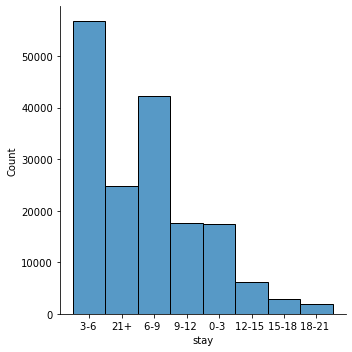

In [111]:
sns.displot(res, x="stay", binwidth=3)

<AxesSubplot:xlabel='stay', ylabel='Count'>

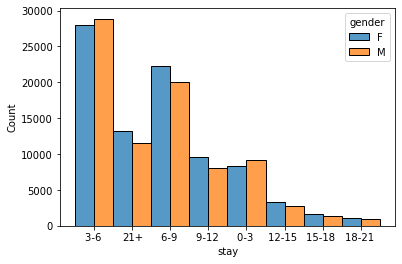

In [112]:
sns.histplot(binwidth=1,
            x="stay",
            hue="gender",
            data=res,
            stat="count",
            multiple="dodge")

In [113]:
res["disposition"].value_counts()

ADMITTED    166303
TRANSFER      7436
Name: disposition, dtype: int64